# Importing python libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from pprint import pprint

In [0]:
stop_words = stopwords.words('english')

# fog__harbor resturant
reading csv files into dataframe

In [0]:
fog_harbor_house = pd.read_csv('fog_harbor_house.csv')


In [0]:
fog_harbor_house.head()

,Unnamed: 0,author,stars,date,text
0,1,Amit M.,Clubfactory customer care number 8101421875\nC...,2019-10-02,5.0
1,2,Eric M.,"Fog harbor fish house, what can I say about th...",2019-10-01,5.0
2,3,Ana B.,We went to SF to celebrate my brother in law's...,2019-10-01,4.0
3,4,Edward A.,Nice little spot in the middle of Pier 39 wher...,2019-09-27,5.0
4,5,Natalie C.,The food was so good that I came here twice du...,2019-09-26,4.0


In [0]:
fog_harbor_house.drop('Unnamed: 0',axis =1, inplace = True)

In [0]:
fog_harbor_house.columns = ['author', 'reviews', 'date', 'ratings']

In [0]:
fog_harbor_house.head(2)

,author,reviews,date,ratings
0,Amit M.,Clubfactory customer care number 8101421875\nC...,2019-10-02,5.0
1,Eric M.,"Fog harbor fish house, what can I say about th...",2019-10-01,5.0


# Using Regex

List of all letters that end with b in fog harbor house

In [202]:
b = fog_harbor_house['reviews'].apply(lambda x: re.findall(r'[a-z]\w*b\b', x))
fog_harbor_b = []
for a in b:
  for d in a:
    if d not in fog_harbor_b:
      fog_harbor_b.append(d)

print(fog_harbor_b)

['crab', 'bomb', 'rab', 'herb', 'cab', 'sub', 'club', 'superb', 'grab', 'ab', 'grub', 'dumb', 'ob', 'job', 'rub', 'lub', 'usb', 'dab', 'bib', 'carb', 'thumb', 'hub', 'cob', 'tab', 'ub', 'uperb', 'obb', 'prob', 'omb', 'cub', 'lb', 'placehgzb']


List of all alphabets

In [204]:
bb = fog_harbor_house['reviews'].apply(lambda x: re.findall(r'[A-Za-z]\w*', x))
words = []
for a in bb:
  for d in a:
    if d not in words:
      words.append(d)

print(words)

['Clubfactory', 'customer', 'care', 'number', 'helpline', 'toll', 'free', 'contact', 'service', 'Fog', 'harbor', 'fish', 'house', 'what', 'can', 'I', 'say', 'about', 'this', 'star', 'seafood', 'gem', 'on', 'Pier', 'think', 'plenty', 'Harbor', 'is', 'the', 'second', 'level', 'of', 'visited', 'weekend', 'a', 'touristy', 'trip', 'to', 'San', 'Francisco', 'chose', 'FH', 'due', 'Yelp', 'reviews', 'read', 'prior', 'traveling', 'Saturday', 'night', 'dining', 'and', 'here', 'thought', 'could', 'make', 'pm', 'reservation', 'around', 'noon', 'be', 'good', 'Haaaaaaaaaa', 'No', 'way', 'they', 'had', 'available', 'asked', 'hostess', 'if', 'still', 'accepted', 'walk', 'ins', 'or', 'it', 'was', 'only', 'she', 'said', 'took', 'but', 'wait', 'minutes', 'popular', 'for', 'reason', 'Anyway', 'digress', 'discovered', 'yelp', 'you', 'add', 'yourself', 'list', 'Holy', 'smokes', 'What', 'brilliant', 'feature', 'So', 'went', 'bar', 'few', 'drinks', 'added', 'myself', 'figured', 'd', 'eat', 'also', 'that', 'fi

# text analysis

In [0]:
fog_harbor_house.ratings.value_counts(normalize = True)* 100

5.0    57.151899
4.0    28.227848
3.0     8.860759
1.0     3.101266
2.0     2.658228
Name: ratings, dtype: float64

In [0]:
reviews = []
fog_harbor_house['reviews'].apply(lambda x : reviews.append(x))

In [0]:
reviews

['Clubfactory customer care number 8101421875\nClubfactory helpline toll free number 8101421875\nClubfactory contact number 8101421875\nClubfactory customer service number 8101421875\n',
 "Fog harbor fish house, what can I say about this 5 star seafood gem on Pier 39?  I think I can say plenty.  \n\nFog Harbor is on the second level of Pier 39, I visited this weekend on a touristy trip to San Francisco.  I chose FH due to the Yelp reviews I read prior to traveling to San Francisco.  \n\nSaturday night dining, and here I thought I could make a 7pm reservation around noon and be good.  Haaaaaaaaaa!!!!!!!!!  No way, 430 and 930 pm is what they had available.  I asked the hostess if they still accepted walk ins around 7pm or if it was reservation only, and she said they took walk ins but the wait could be 60-90 minutes.  FH is popular, and for good reason.\n\nAnyway, I digress, I discovered on yelp you can add yourself to the wait list.  Holy smokes!!!  What a brilliant feature.  So, I wen

# Sentiment Analysis

In [0]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from nltk.sentiment import SentimentIntensityAnalyzer as SIA

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
sia = SIA()
result = []

for review in reviews:
  polarity_score = sia.polarity_scores(review)
  polarity_score['reviews'] = review
  result.append(polarity_score)


In [0]:
df = pd.DataFrame.from_records(result)

In [0]:
df[(df['compound'] >0.2) & (df['compound'] < 0.3)]

,compound,neg,neu,pos,reviews
180,0.2846,0.065,0.809,0.127,You get what you pay for. The Fog Harbor Fish ...
366,0.2575,0.000,0.956,0.044,The multiple times I've gone there I sit at th...
580,0.2263,0.119,0.742,0.139,"Meh. Heavy handed presentation on all plates,..."
638,0.2960,0.000,0.965,0.035,"Stunning views, white tablecloths covered with..."
678,0.2732,0.000,0.963,0.037,This is probably my favorate sea food I have t...
750,0.2263,0.000,0.971,0.029,The manager Bob P commented on another post a ...
1069,0.2023,0.000,0.886,0.114,Food is heavy. Bread is sour. Couldn't underst...
1111,0.2464,0.107,0.772,0.121,I use to come here whenever my friends came in...
1119,0.2500,0.146,0.613,0.241,Clan chowder soup was good. Salmon and Sole ...
1555,0.2732,0.158,0.609,0.233,Had a beer and New England clam chowder at the...


In [0]:
df['character_length'] = df['reviews'].str.len()

In [0]:
df

,compound,neg,neu,pos,reviews,label,character_length
0,0.8271,0.000,0.545,0.455,Clubfactory customer care number 8101421875 Cl...,1,178
1,0.9982,0.010,0.792,0.198,"Fog harbor fish house, what can I say about th...",1,2197
2,0.9876,0.013,0.844,0.144,We went to SF to celebrate my brother in law's...,1,1178
3,-0.3780,0.092,0.811,0.098,Nice little spot in the middle of Pier 39 wher...,-1,853
4,0.9973,0.013,0.769,0.218,The food was so good that I came here twice du...,1,1632
5,0.9831,0.036,0.813,0.151,I've always wanted to try somewhere new and st...,1,1105
6,0.9985,0.011,0.604,0.385,So far everything is very good. I love Scomas...,1,978
7,0.9766,0.046,0.797,0.157,We went to dinner at the Fog House last night ...,1,1269
8,0.9943,0.000,0.805,0.195,We were staying in a hotel close to Fisherman'...,1,1291
9,0.8550,0.012,0.906,0.082,Go for the ambiance and the fact that they uti...,1,753


In [0]:
df['reviews'] = df['reviews'].str.replace('\n', ' ')

In [0]:
df['label'] = 1

In [0]:
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < 0.2, 'label'] = -1

In [0]:
newdf = df[['compound', 'label']]
newdf.to_csv('fog_harbor_new', mode = 'a', encoding='utf-8', index=False)

negative and positive reviews

In [0]:
print('positive titles:\n')
pprint(list(df[df['label']==1]['reviews'])[:5], width = 200)


print('\nnegative titles:\n')
pprint(list(df[df['label']==-1]['reviews'])[:5], width = 200)

positive titles:

['Clubfactory customer care number 8101421875 Clubfactory helpline toll free number 8101421875 Clubfactory contact number 8101421875 Clubfactory customer service number 8101421875 ',
 'Fog harbor fish house, what can I say about this 5 star seafood gem on Pier 39?  I think I can say plenty.    Fog Harbor is on the second level of Pier 39, I visited this weekend on a touristy '
 'trip to San Francisco.  I chose FH due to the Yelp reviews I read prior to traveling to San Francisco.    Saturday night dining, and here I thought I could make a 7pm reservation around noon and '
 'be good.  Haaaaaaaaaa!!!!!!!!!  No way, 430 and 930 pm is what they had available.  I asked the hostess if they still accepted walk ins around 7pm or if it was reservation only, and she said they '
 'took walk ins but the wait could be 60-90 minutes.  FH is popular, and for good reason.  Anyway, I digress, I discovered on yelp you can add yourself to the wait list.  Holy smokes!!!  What a '
 "brill

In [0]:
df.label.value_counts(normalize = True)* 100

 1    95.506329
-1     4.493671
Name: label, dtype: float64

In [0]:
df.head()

,compound,neg,neu,pos,reviews,label
0,0.8271,0.000,0.545,0.455,Clubfactory customer care number 8101421875 Cl...,1
1,0.9982,0.010,0.792,0.198,"Fog harbor fish house, what can I say about th...",1
2,0.9876,0.013,0.844,0.144,We went to SF to celebrate my brother in law's...,1
3,-0.3780,0.092,0.811,0.098,Nice little spot in the middle of Pier 39 wher...,-1
4,0.9973,0.013,0.769,0.218,The food was so good that I came here twice du...,1


Visualization

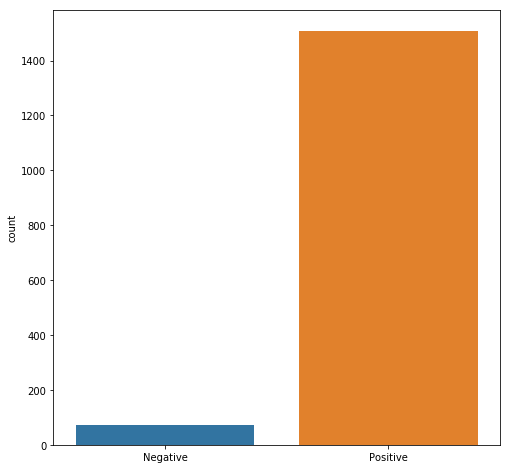

In [0]:
import seaborn as sns

count = df['label'].value_counts()

fig, ax = plt.subplots(figsize = (8,8))

sns.barplot(count.index, count, ax=ax)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("count")

plt.show()

Tokenization

In [0]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [0]:
tokenizer = RegexpTokenizer('\w+')

In [0]:
def preprocess_text(reviews):
  tokens = []
  for line in reviews:
    token = tokenizer.tokenize(line)
    token = [t.lower() for t in token if t.lower() not in stop_words]
    tokens.extend(token)
    
  return tokens

In [0]:
positive_lines = list(df[df['label']==1].reviews)

positive_tokens = preprocess_text(positive_lines)
positive_frequency = nltk.FreqDist(positive_tokens)

positive_frequency.most_common(50)

[('food', 1072),
 ('great', 1037),
 ('good', 979),
 ('chowder', 922),
 ('crab', 847),
 ('clam', 778),
 ('service', 770),
 ('seafood', 714),
 ('place', 695),
 ('restaurant', 549),
 ('bread', 548),
 ('view', 547),
 ('delicious', 513),
 ('ordered', 452),
 ('us', 443),
 ('would', 429),
 ('nice', 427),
 ('time', 413),
 ('pier', 409),
 ('got', 402),
 ('best', 399),
 ('also', 397),
 ('amazing', 396),
 ('really', 393),
 ('fish', 378),
 ('fresh', 366),
 ('back', 365),
 ('well', 364),
 ('get', 359),
 ('came', 359),
 ('one', 346),
 ('server', 329),
 ('harbor', 324),
 ('wait', 316),
 ('definitely', 312),
 ('like', 312),
 ('table', 305),
 ('fog', 304),
 ('recommend', 288),
 ('dinner', 287),
 ('bowl', 267),
 ('39', 254),
 ('meal', 249),
 ('garlic', 249),
 ('san', 247),
 ('shrimp', 243),
 ('come', 243),
 ('go', 237),
 ('5', 232),
 ('even', 228)]

Frequency distribution visualization

In [0]:
import matplotlib.pyplot as plt

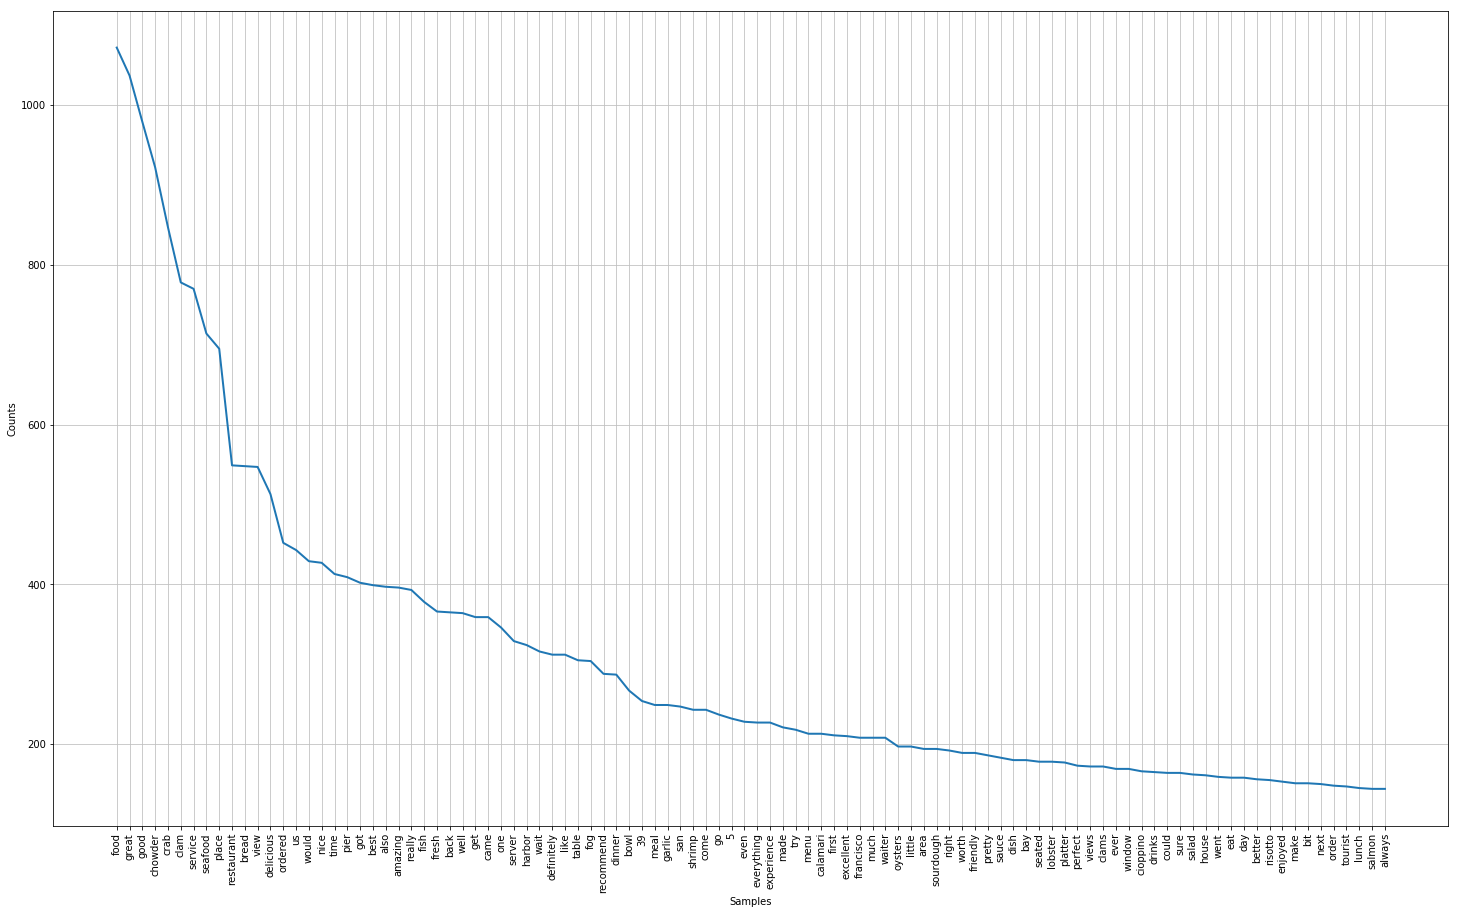

In [0]:
plt.figure(figsize = (25,15))
positive_frequency.plot(100, cumulative = False)
plt.show()

# MonaLisa Resturant


reading csv file into dataframe

In [0]:
mona_lisa = pd.read_csv('mona-lisa_resturant.csv')

In [0]:
mona_lisa.drop('Unnamed: 0', axis = 1, inplace = True)

In [0]:
mona_lisa.head()

,author,text,date,stars
0,Michael N.,A big thank you to Mona Lisa in North Beach fo...,2019-09-12,5.0
1,Meredith P.,Mona Lisa is a very fun/lively restaurant with...,2019-09-10,4.0
2,scott h.,A solid four stars. \n\nThe fried calamari was...,2019-09-01,4.0
3,Julie K.,Mona Lisa's pasta is amazing! There's a wide r...,2019-08-25,4.0
4,Lilly K.,STOP READING RIGHT NOW AND JUST GO! \n\nBut if...,2019-08-28,5.0


In [0]:
mona_lisa.columns = ['author', 'reviews','date', 'ratings']

In [0]:
mona_lisa['character_length'] = mona_lisa['reviews'].str.len()

In [0]:
mona_lisa['reviews'] = mona_lisa['reviews'].str.replace('\n', ' ')

In [0]:
mona_lisa['reviews'] = mona_lisa['reviews'].str.replace('/', ' ')

# Regex

small letters ending with letter'b'

In [208]:
monab = mona_lisa['reviews'].apply(lambda x: re.findall(r'[a-z]\w*b\b', x))
mona_lisa_b = []
for a in monab:
  for d in a:
    if d not in mona_lisa_b:
      mona_lisa_b.append(d)

print(mona_lisa_b)

['superb', 'job', 'celeb', 'verb', 'rubHub', 'urpurb', 'sub', 'herb', 'grab', 'uperb', 'fab', 'thumb', 'crab', 'eb', 'suberb', 'ab', 'bomb', 'cab', 'tab', 'drab']


All letters

In [210]:
mona_lisa_w = mona_lisa['reviews'].apply(lambda x: re.findall(r'[A-Za-z]\w*', x))
mona_lisa_words = []
for a in mona_lisa_w:
  for d in a:
    if d not in mona_lisa_words:
      mona_lisa_words.append(d)

print(mona_lisa_words)

['A', 'big', 'thank', 'you', 'to', 'Mona', 'Lisa', 'in', 'North', 'Beach', 'for', 'the', 'delicious', 'food', 'we', 'ate', 'it', 'their', 'car', 'out', 'front', 'It', 'was', 'so', 'romantic', 'and', 'a', 'lot', 'of', 'people', 'were', 'walking', 'by', 'taking', 'pictures', 'We', 'sang', 'some', 'songs', 'them', 'while', 'much', 'fun', 'The', 'owner', 'Maurizio', 'is', 'really', 'sweet', 'guy', 'he', 's', 'been', 'kind', 'us', 'since', 'started', 'going', 'there', 'years', 'ago', 'had', 'never', 'dined', 'but', 'convinced', 'didn', 't', 'regret', 'got', 'pizza', 'pasta', 'salad', 'Just', 'right', 'balance', 'And', 'teaching', 'Italian', 'So', 'definitely', 'something', 'every', 'San', 'Franciscan', 'or', 'tourist', 'should', 'do', 'at', 'least', 'once', 'life', 'You', 'won', 'Sincerely', 'michaelniktaris', 'CEO', 'aquarius3e', 'LLC', 'very', 'lively', 'restaurant', 'with', 'good', 'menu', 'vast', 'ranges', 'from', 'seafood', 'that', 'looked', 'smelled', 'amazing', 'feasted', 'lunch', 'u

# Sentiment Analysis

In [0]:
sia1 = SIA()

In [0]:
review1 = []
mona_lisa['reviews'].apply(lambda x: review1.append(x) )

In [0]:
result1 = []

for review in review1:
  polarity_score = sia1.polarity_scores(review)
  polarity_score['reviews'] = review
  result1.append(polarity_score)

In [0]:
df1 = pd.DataFrame.from_records(result1)

In [0]:
df1['label'] = 1

In [0]:
df1.loc[df1['compound']< 0.2, 'label']= -1
df1.loc[df1['compound']> 0.2, 'label']= 1

In [0]:
label_perc = df1.label.value_counts(normalize = True)* 100

In [0]:
label_perc

 1    88.555556
-1    11.444444
Name: label, dtype: float64

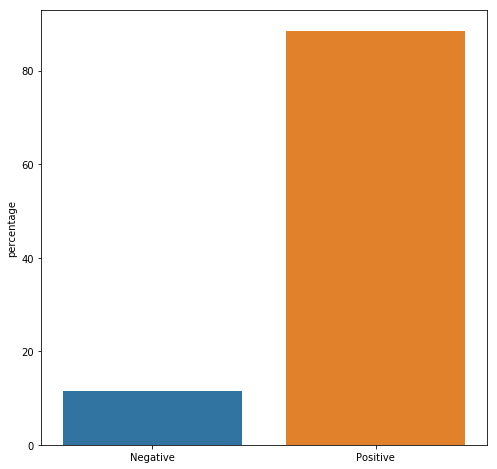

In [0]:
fig , ax = plt.subplots(figsize= (8,8))
sns.barplot(label_perc.index, label_perc, ax = ax)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel('percentage')
plt.show()

In [0]:
print('positive reviews\n')
pprint(list(df1[df1['label']== 1]['reviews'])[:5], width = 200)

print('\nnegative reviews\n')
pprint(list(df1[df1['label']== -1]['reviews'])[:5], width = 200)

positive reviews

['A big thank you to Mona Lisa in North Beach for the delicious food, we ate it in their car out in front. It was so romantic and a lot of people were walking by taking pictures. We sang some songs '
 "to them while we ate. It was so much fun.  The owner Maurizio is a really sweet guy, he's been so kind to us since we started going there 3 years ago. We had never dined in the car, but he "
 "convinced us and we didn't regret it! We got a pizza, a pasta and a salad. Just the right balance. And Maurizio was teaching us some Italian while we were in the car. So fun!!!  It's definitely "
 "something every San Franciscan or tourist should do at least once is their life! You won't regret it!!!  Sincerely, @michaelniktaris CEO @aquarius3e LLC ",
 'Mona Lisa is a very fun lively restaurant with really good food! The menu is vast and ranges from pasta and pizza to seafood that looked (and smelled) amazing.   We had feasted at lunch, so '
 'unfortunately we were not starving wh

In [0]:
positive_lines1 = list(df1[df1['label']==1]['reviews'])
positive_tokens1 = preprocess_text(positive_lines1)
positive_frequency1 = nltk.FreqDist(positive_tokens1)

positive_frequency1 .most_common(50)

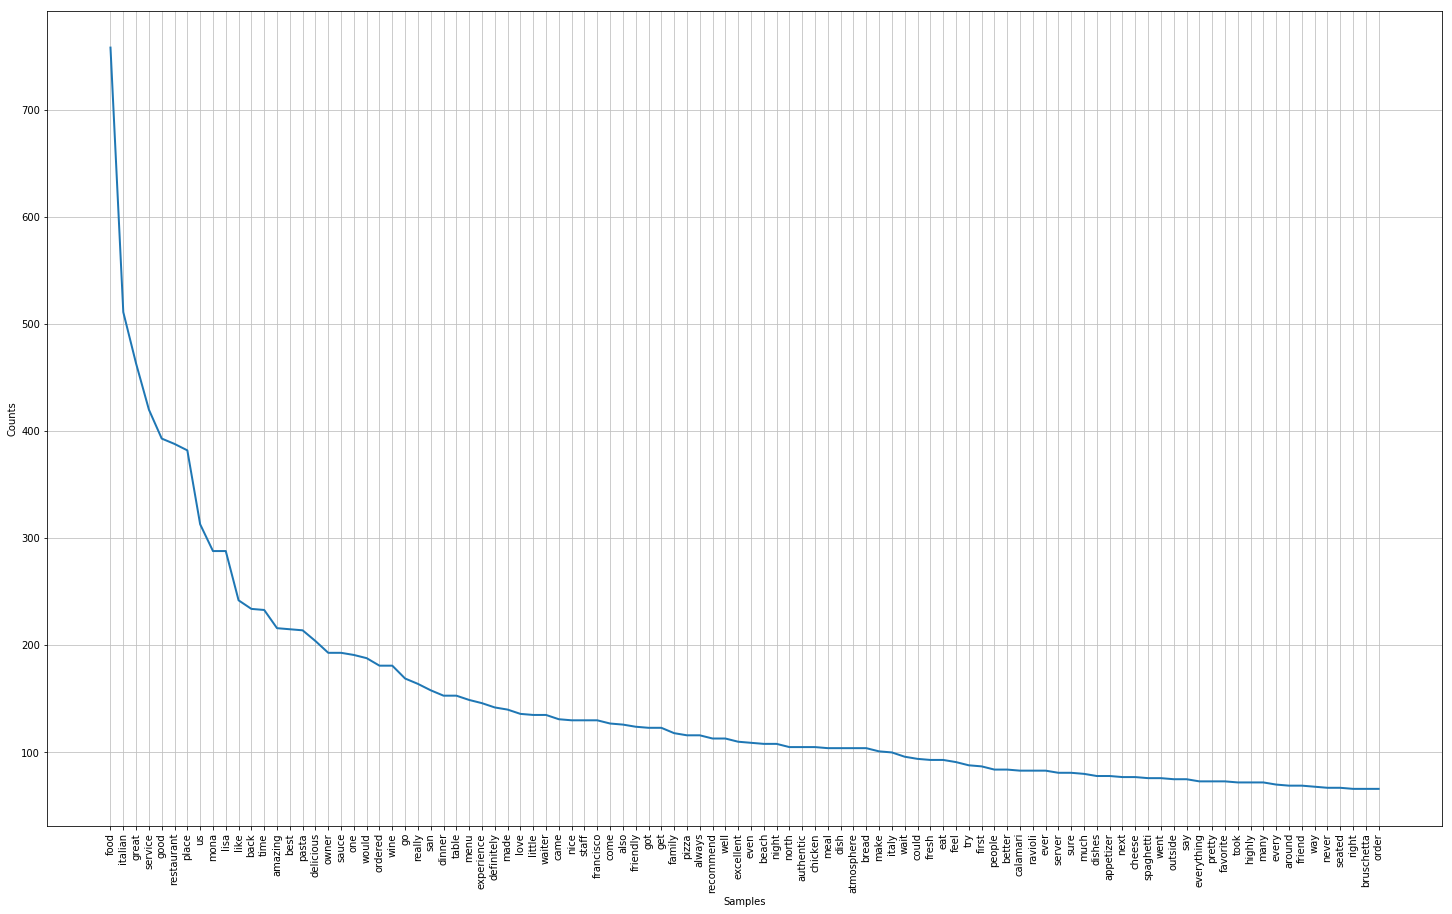

In [0]:
plt.figure(figsize = (25,15))
positive_frequency1.plot(100, cumulative = False)
plt.show()

# DJ sushi

In [0]:
djsushi = pd.read_csv('djsushi.csv')

In [0]:
djsushi.head()

,Unnamed: 0,author,stars,date,text
0,1,Ritchelle M.,I love this place you must try it! They have t...,2019-09-26,5.0
1,2,Hye Ryung J.,Don't go to this restaurant. The asian waitres...,2019-09-17,1.0
2,3,Kailyn T.,This review will be quick and snappy. \n\nWe c...,2019-07-27,3.0
3,4,Sarah S.,Good ambiance! We came here for a friend's bir...,2019-09-20,5.0
4,5,Yvonne M.,Hella good. My entire family raved about how ...,2019-09-04,5.0


In [0]:
djsushi.drop('Unnamed: 0', axis = 1, inplace = True)

In [0]:
djsushi.columns=['author', 'reviews', 'date', 'ratings']

In [0]:
djsushi['reviews'] = djsushi['reviews'].str.replace('\n', ' ')

# Regex

finding all letters that end with a b

In [211]:
djsushib = djsushi['reviews'].apply(lambda x: re.findall(r'[a-z]\w*b\b', x))
djsushi_b = []
for a in djsushib:
  for d in a:
    if d not in djsushi_b:
      djsushi_b.append(d)

print(djsushi_b)

['crab', 'prob', 'lamb', 'sub', 'job', 'lob', 'bomb', 'grub', 'hub', 'grab']


finding all letters

In [212]:
djsushi_w = djsushi['reviews'].apply(lambda x: re.findall(r'[A-Za-z]\w*', x))
djsushi_letters = []
for a in djsushi_w:
  for d in a:
    if d not in djsushi_letters:
      djsushi_letters.append(d)

print(djsushi_letters)

['I', 'love', 'this', 'place', 'you', 'must', 'try', 'it', 'They', 'have', 'the', 'best', 'sushi', 'in', 'town', 'nice', 'customer', 'service', 'always', 'get', 'lion', 'king', 'roll', 's', 'my', 'favorite', 'and', 'if', 'check', 'll', 'a', 'free', 'soup', 'or', 'soda', 'Don', 't', 'go', 'to', 'restaurant', 'The', 'asian', 'waitress', 'there', 'is', 'totally', 'rude', 'ignorant', 'customers', 'saw', 'one', 'next', 'me', 'who', 'ordered', 'takeout', 'he', 'was', 'asking', 'her', 'food', 'already', 'done', 'voice', 'really', 'low', 'that', 'nobody', 'can', 'HELL', 'understand', 'obviously', 'didn', 'hear', 'what', 'she', 'saying', 'suddenly', 'looks', 'at', 'him', 'with', 'poor', 'reaction', 'answered', 'annoyingly', 'She', 'doesn', 'attend', 'other', 'properly', 'as', 'well', 'mean', 'behavior', 'should', 'be', 'fired', 'opinion', 'Moreover', 'price', 'quite', 'expensive', 'compared', 'taste', 'wasn', 'bad', 'but', 'still', 'isn', 'worth', 'Anyway', 'horrible', 'even', 'give', 'them', '

In [0]:
review2 = []

In [0]:
djsushi['reviews'].apply(lambda x: review2.append(x))

In [0]:
sia2 = SIA()

In [0]:
result2 = []
for review in review2:
  polarity_score = sia.polarity_scores(review)
  polarity_score['reviews'] = review
  result2.append(polarity_score)

In [0]:
df2 = pd.DataFrame.from_records(result2)

In [0]:
df2['label'] = 1
df2.loc[df2['compound']> 0.2, 'label'] = 1
df2.loc[df2['compound']< 0.2, 'label'] = -1

In [0]:
df2_perc = df2.label.value_counts(normalize = True)* 100

In [0]:
df2_perc

 1    78.125
-1    21.875
Name: label, dtype: float64

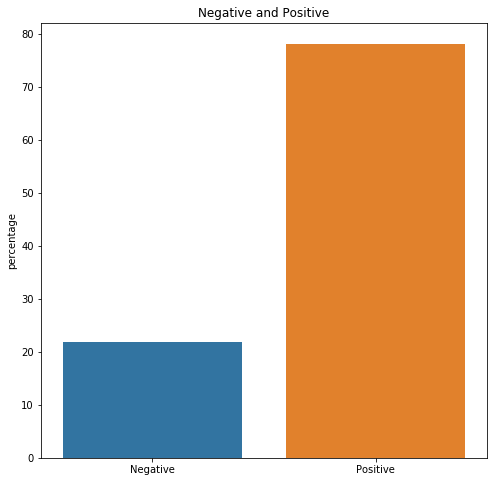

In [0]:
fig, ax = plt.subplots(figsize= (8,8))
sns.barplot(df2_perc.index, df2_perc, ax = ax)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel('percentage')
ax.set_title('Negative and Positive')
plt.show()

In [0]:
print('positive  reviews\n')
pprint(list(df2[df2['label']==1]['reviews'])[:5], width = 200)

print('\nnegative reviews\n')
pprint(list(df2[df2['label']== -1]['reviews'])[:5], width = 200)

positive  reviews

["I love this place you must try it! They have the best sushi in town nice customer service  I always get the lion king roll it's my favorite and if you check in you'll get a free soup or soda ",
 'This review will be quick and snappy.   We came to DJ Sushi trying to decide between a higher rated place further away, or to go with the closer, three star place that was DJ. It shows that '
 "sometimes it pays to try 'em out for yourself.   Definitely a-okay, and gets extra points because that roll with the mango in it was a sweet surprise that I find rarer to find and for the top "
 "notch service even as we came in towards the closing hours of the night.   If you are already in the neighborhood, it's a good pick and does the trick. ",
 "Good ambiance! We came here for a friend's birthday and enjoyed a private indoor upper level that could fit up to 15 people. Our birthday boy loved it! Thanks for having us! ",
 'Hella good.  My entire family raved about how delicious t

In [0]:
positive_lines2 = list(df2[df2['label']==1]['reviews'])
positive_tokens2 = preprocess_text(positive_lines2)
positive_frequency2 = nltk.FreqDist(positive_tokens2)

positive_frequency2 .most_common(50)

[('sushi', 102),
 ('ramen', 99),
 ('good', 73),
 ('food', 67),
 ('roll', 66),
 ('place', 60),
 ('ordered', 46),
 ('great', 39),
 ('like', 39),
 ('came', 38),
 ('time', 36),
 ('one', 36),
 ('really', 34),
 ('order', 33),
 ('rolls', 31),
 ('service', 30),
 ('delivery', 29),
 ('soup', 28),
 ('fresh', 28),
 ('restaurant', 26),
 ('got', 25),
 ('also', 24),
 ('pretty', 24),
 ('nice', 22),
 ('spicy', 22),
 ('get', 21),
 ('10', 21),
 ('love', 20),
 ('would', 20),
 ('delicious', 19),
 ('noodles', 19),
 ('definitely', 18),
 ('miso', 18),
 ('go', 17),
 ('tasted', 17),
 ('super', 17),
 ('never', 17),
 ('little', 17),
 ('try', 16),
 ('even', 16),
 ('well', 16),
 ('2', 16),
 ('come', 16),
 ('salad', 16),
 ('sashimi', 16),
 ('fish', 16),
 ('happy', 16),
 ('back', 16),
 ('dj', 15),
 ('amazing', 15)]

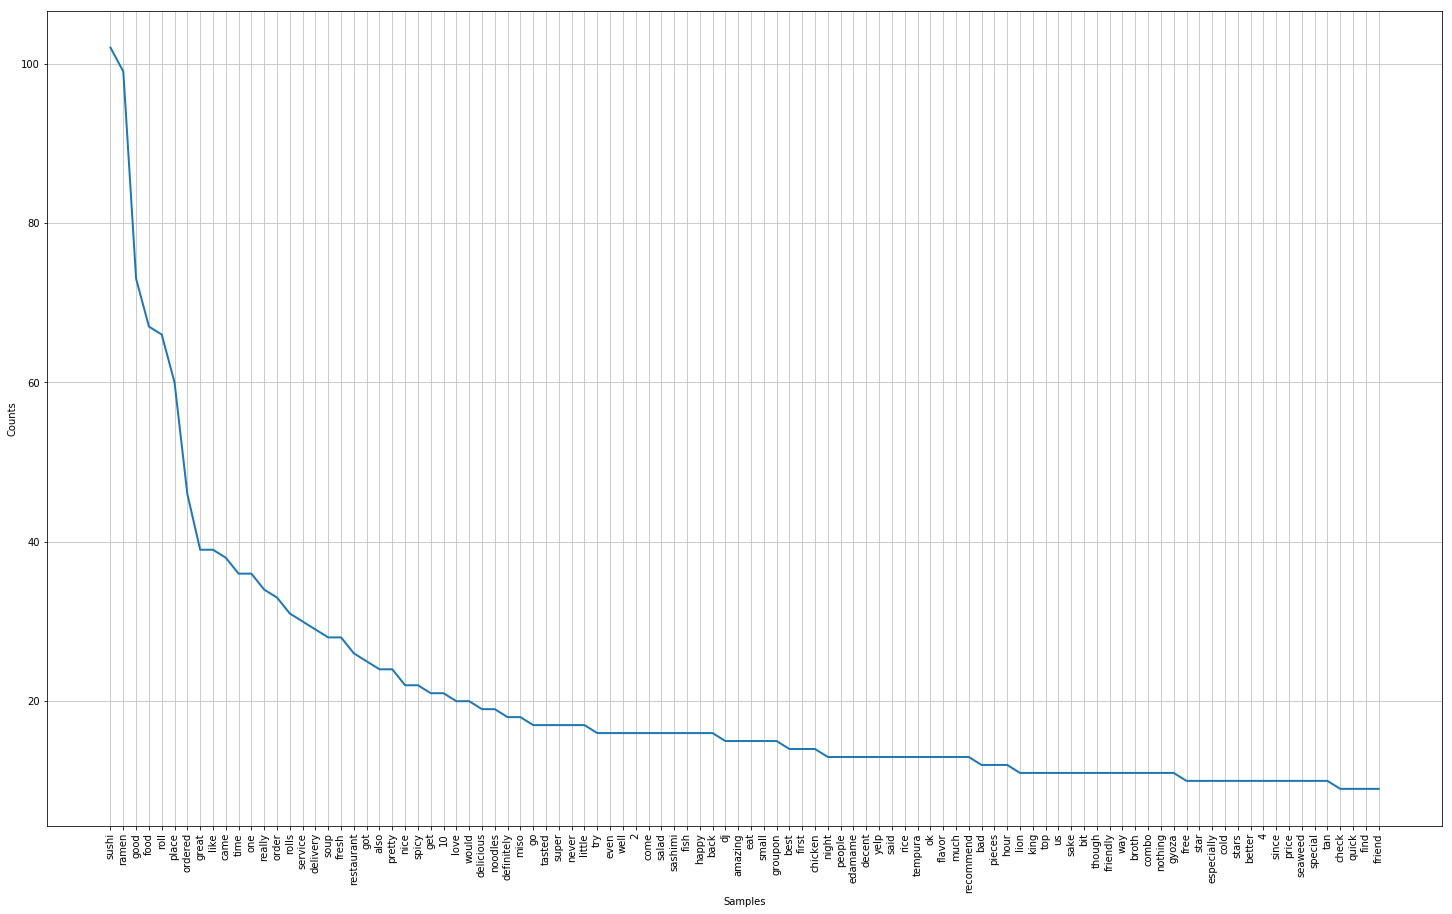

In [0]:
plt.figure(figsize = (25,15))
positive_frequency2.plot(100, cumulative = False)
plt.show()

In [0]:
negative_lines2 = list(df2[df2['label']== -1]['reviews'])
negative_tokens2 = preprocess_text(negative_lines2)
negative_frequency2 = nltk.FreqDist(negative_tokens2)

negative_frequency2 .most_common(50)

[('sushi', 28),
 ('food', 17),
 ('ramen', 17),
 ('ordered', 15),
 ('one', 14),
 ('delivery', 14),
 ('place', 14),
 ('roll', 12),
 ('sauce', 11),
 ('really', 10),
 ('order', 10),
 ('restaurant', 8),
 ('bad', 8),
 ('service', 8),
 ('good', 8),
 ('pieces', 8),
 ('rolls', 7),
 ('pretty', 7),
 ('came', 6),
 ('terrible', 6),
 ('got', 6),
 ('like', 6),
 ('waitress', 5),
 ('customers', 5),
 ('price', 5),
 ('give', 5),
 ('time', 5),
 ('ok', 5),
 ('never', 5),
 ('eat', 5),
 ('get', 5),
 ('unagi', 5),
 ('better', 5),
 ('would', 5),
 ('ever', 5),
 ('tiny', 5),
 ('small', 5),
 ('tuna', 5),
 ('customer', 4),
 ('next', 4),
 ('horrible', 4),
 ('even', 4),
 ('experience', 4),
 ('know', 4),
 ('worst', 4),
 ('dinner', 4),
 ('thing', 4),
 ('great', 4),
 ('back', 4),
 ('took', 4)]

In [0]:
letterslist = []
w_b = []

In [0]:
def finding(data):
  b = data['reviews'].apply(lambda x: re.findall(r'[a-z]\w*b\b', x))
  letters = data['reviews'].apply(lambda x: re.findall(r'[A-Za-z]\w*', x))
  letterslist = []
  w_b = []
  for a in b:
    for d in a:
      if d not in w_b:
        w_b.append(d)

        for let in letters:
          for l in let:
            if l not in letterslist:
              letterslist.append(l)
  print("letterslist\n",letterslist, '\nw_b\n', w_b)
  

In [223]:
finding(djsushi)

letterslist
 ['I', 'love', 'this', 'place', 'you', 'must', 'try', 'it', 'They', 'have', 'the', 'best', 'sushi', 'in', 'town', 'nice', 'customer', 'service', 'always', 'get', 'lion', 'king', 'roll', 's', 'my', 'favorite', 'and', 'if', 'check', 'll', 'a', 'free', 'soup', 'or', 'soda', 'Don', 't', 'go', 'to', 'restaurant', 'The', 'asian', 'waitress', 'there', 'is', 'totally', 'rude', 'ignorant', 'customers', 'saw', 'one', 'next', 'me', 'who', 'ordered', 'takeout', 'he', 'was', 'asking', 'her', 'food', 'already', 'done', 'voice', 'really', 'low', 'that', 'nobody', 'can', 'HELL', 'understand', 'obviously', 'didn', 'hear', 'what', 'she', 'saying', 'suddenly', 'looks', 'at', 'him', 'with', 'poor', 'reaction', 'answered', 'annoyingly', 'She', 'doesn', 'attend', 'other', 'properly', 'as', 'well', 'mean', 'behavior', 'should', 'be', 'fired', 'opinion', 'Moreover', 'price', 'quite', 'expensive', 'compared', 'taste', 'wasn', 'bad', 'but', 'still', 'isn', 'worth', 'Anyway', 'horrible', 'even', 'giv